In [21]:
import numpy as np
import scipy as sp
import new_correction as nc
import matplotlib.pyplot as plt

In [22]:
path = '/datadisk/MIME/discrete_test/'
protein_concentrations = [0.1, 1, 10]
number_sequences = 500000
c = 200

In [23]:
logK_sequences_r1, logK_mutations_r1, logK_sequences_r2, logK_mutations_r2, ground_truth, round_1_sequence_effects, round_2_sequence_effects = nc.logK_inference(path, protein_concentrations, c, number_sequences)

Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.


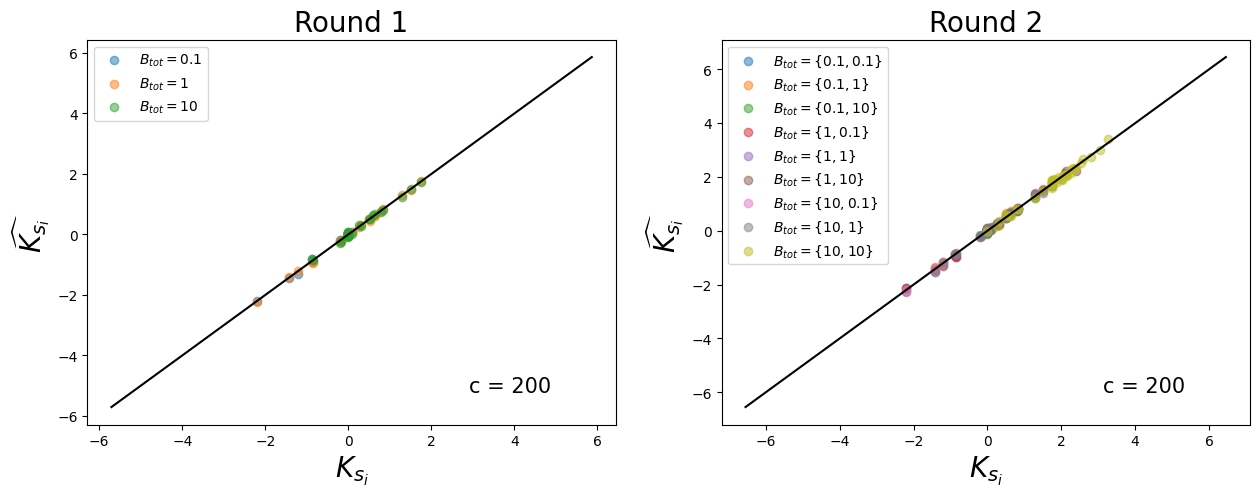

In [24]:
# set up 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# plot round_1 sequence effects vs logK_sequences_r1
for i in range(0,len(protein_concentrations)**2, 3):
    axes[0].scatter(round_1_sequence_effects[i], logK_sequences_r1[i], alpha=0.5)
# set x and y labels
axes[0].set_xlabel('$K_{s_i}$', fontsize=20)
axes[0].set_ylabel('$\widehat{K_{s_i}}$', fontsize=20)
# set title
axes[0].set_title('Round 1', fontsize=20)
# plot 1:1 line
axes[0].plot([np.min(round_1_sequence_effects[0]), np.max(round_1_sequence_effects[0])], [np.min(round_1_sequence_effects[0]), np.max(round_1_sequence_effects[0])], color='black')
# add c text top left
axes[0].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=15)
# add legend
axes[0].legend(['$B_{tot} = 0.1$', '$B_{tot} = 1$', '$B_{tot} = 10$'], fontsize=10)

# plot round_2 sequence effects vs logK_sequences_r2
for i in range(len(protein_concentrations)**2):
    axes[1].scatter(round_2_sequence_effects[i], logK_sequences_r2[i], alpha=0.5)
# set x and y labels
axes[1].set_xlabel('$K_{s_i}$', fontsize=20)
axes[1].set_ylabel('$\widehat{K_{s_i}}$', fontsize=20)
# set title
axes[1].set_title('Round 2', fontsize=20)
# plot 1:1 line
axes[1].plot([np.min(round_2_sequence_effects[0]), np.max(round_2_sequence_effects[0])], [np.min(round_2_sequence_effects[0]), np.max(round_2_sequence_effects[0])], color='black')
# add c text top left
axes[1].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=15)
# add legend
axes[1].legend(['$B_{tot} = \{0.1, 0.1\}$', '$B_{tot} = \{0.1, 1\}$', '$B_{tot} = \{0.1, 10\}$', '$B_{tot} = \{1, 0.1\}$', '$B_{tot} = \{1, 1\}$', '$B_{tot} = \{1, 10\}$', '$B_{tot} = \{10, 0.1\}$', '$B_{tot} = \{10, 1\}$', '$B_{tot} = \{10, 10\}$'], fontsize=10)

plt.show()


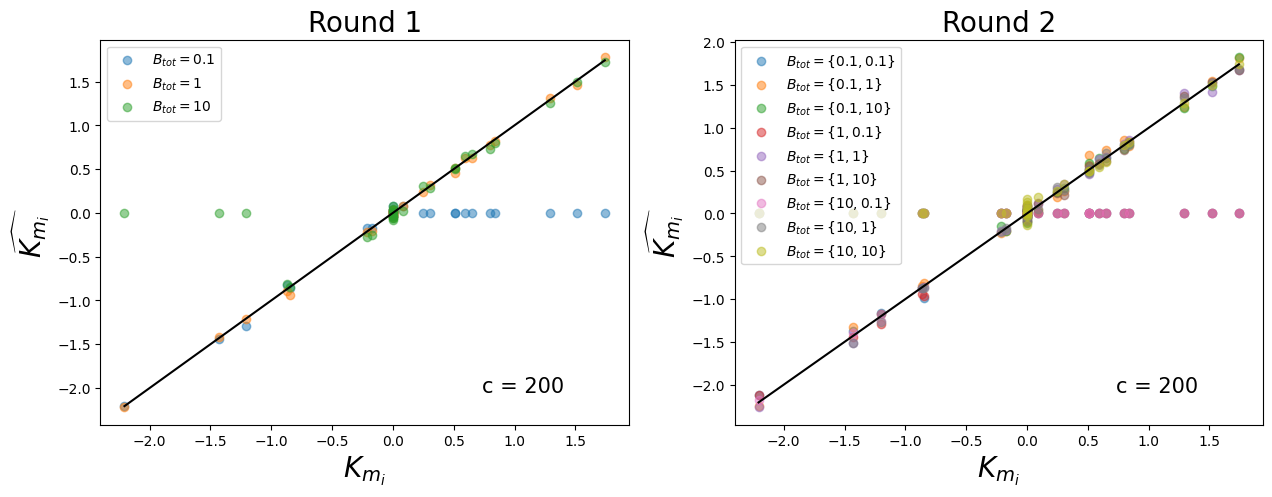

In [25]:
# set up 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# plot ground_truth vs logK_mutations_r1
for i in range(0,len(protein_concentrations)**2, 3):
    axes[0].scatter(ground_truth, logK_mutations_r1[i], alpha=0.5)
# set x and y labels
axes[0].set_xlabel('$K_{m_i}$', fontsize=20)
axes[0].set_ylabel('$\widehat{K_{m_i}}$', fontsize=20)
# set title
axes[0].set_title('Round 1', fontsize=20)
# plot 1:1 line
axes[0].plot([np.min(ground_truth), np.max(ground_truth)], [np.min(ground_truth), np.max(ground_truth)], color='black')
# add c text top left
axes[0].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=15)
# add legend
axes[0].legend(['$B_{tot} = 0.1$', '$B_{tot} = 1$', '$B_{tot} = 10$'], fontsize=10)

# plot ground_truth vs logK_mutations_r2
for i in range(len(protein_concentrations)**2):
    axes[1].scatter(ground_truth, logK_mutations_r2[i], alpha=0.5)
# set x and y labels
axes[1].set_xlabel('$K_{m_i}$', fontsize=20)
axes[1].set_ylabel('$\widehat{K_{m_i}}$', fontsize=20)
# set title
axes[1].set_title('Round 2', fontsize=20)
# plot 1:1 line
axes[1].plot([np.min(ground_truth), np.max(ground_truth)], [np.min(ground_truth), np.max(ground_truth)], color='black')
# add c text top left
axes[1].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=15)
# add legend
axes[1].legend(['$B_{tot} = \{0.1, 0.1\}$', '$B_{tot} = \{0.1, 1\}$', '$B_{tot} = \{0.1, 10\}$', '$B_{tot} = \{1, 0.1\}$', '$B_{tot} = \{1, 1\}$', '$B_{tot} = \{1, 10\}$', '$B_{tot} = \{10, 0.1\}$', '$B_{tot} = \{10, 1\}$', '$B_{tot} = \{10, 10\}$'], fontsize=10)

plt.show()